## データの取得
「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」

In [1]:
import numpy as np

# 指数表示の禁止を設定する
np.set_printoptions(suppress=True) 

# 富士山データを読み込み
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

In [2]:
# 実物確認
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## 【問題1】断面図の作成
前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

参考情報：'MarkerIndices',[1 5 10]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

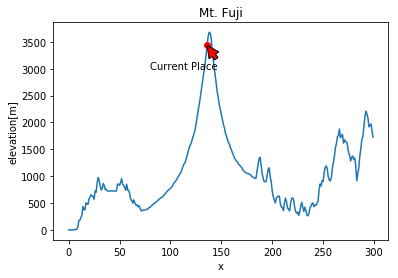

In [4]:
# x軸
plt.xlabel("x")

# y軸
plt.ylabel("elevation[m]")

# タイトル
plt.title("Mt. Fuji")

# x軸とy軸を設定
plt.plot(fuji[:,0], fuji[:,3],)

# 頂点に印をつける
plt.plot(fuji[136,0],fuji[136,3],c="red",marker='o')

# 矢印の表記
plt.annotate( "Current Place", xy=(136,fuji[136,3]) , xytext=(80,3000) , arrowprops=dict(facecolor='red'))

# 描画
plt.show()

## 【問題2】勾配の計算の関数
「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

In [5]:
# 現在地点 x から x-1 の地点への勾配計算関数
def compute_gradient(x):
    return (fuji[x,3] - fuji[x-1,3]) / (x-(x-1))

In [6]:
compute_gradient(136)

168.35000000000036

## 【問題3】勾配降下法の関数を作成
数式で表すと
「移動すべき地点 = 今いる地点 - α ×今いる地点の勾配」 
nとなります。

In [7]:
# 符号判定の関数
def sign(n):
    if n > 0:
        return 1
    else:
        return -1

In [8]:
# 勾配降下法の関数
def gradient_descent(x, alpha):
    # その地点の勾配
    gradient = compute_gradient(x)

    # 高さ
    y = fuji[x,3]
    
    # 高さ一覧を格納する配列生成
    y_array =  np.array([y])

    # 符号格納
    gradient_sign = sign(gradient)
    
    # 回数記録
    i = 1
    
    # 降下し続ける
    while True:
        
        # x地点の勾配計算
        gradient = compute_gradient(x)

        # 符号が同一である限り
        if sign(gradient) == gradient_sign:

            # x軸移動
            x -= alpha * gradient

            i += 1
            
            # xは位置情報で整数のため四捨五入
            x = int(np.round(x))

            # x時点の高さ
            y = fuji[x,3]
            
            # 高さ一覧に格納
            y_array =  np.append(y_array,y)
            
            # 位置と高さを出力
            print(x, y)
            
        else:
            return x, y_array, i

In [9]:
x , y_array , i = gradient_descent(150, 0.3)

178 1033.52
181 985.66
183 960.52
186 1203.92


In [10]:
x, y_array , i

(186, array([2146.01, 1033.52,  985.66,  960.52, 1203.92]), 5)

## 【問題4】初期値の変更
初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化

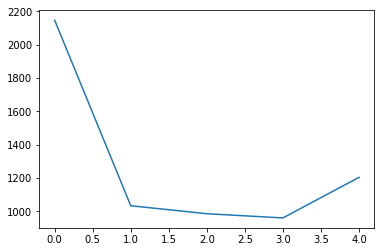

In [11]:
plt.plot(y_array)
plt.show()

## 【問題5】（アドバンス課題）並列計算
NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。

In [12]:
def parallel_gradient_descent(x, alpha, i):

    # 勾配計算
    gradient = compute_gradient(x)
    
    # xの個数分、行を生成して値を格納できるようにする
    y_array = fuji[x,3].reshape(len(x),1)
    
    # 指定の回数繰り返し
    for _ in range(i):
        
        # 勾配計算
        gradient = compute_gradient(x)
        
        # 勾配と学習係数分移動する
        x = x - alpha * gradient
        
        # 整数化する
        x = np.round(x).astype(np.int64)
        
        # 高さを出す
        y = fuji[x,3]
        
        # xの個数分、行を生成して値を格納できるようにする
        y = y.reshape(len(x),1)
        
        # 列方向に結合する
        y_array =  np.concatenate((y_array,y),axis=1)
            
    return x, y_array

In [13]:
# 任意の個数の地点値をセットする
x = np.array([100,130,160])

In [14]:
x, y_array = parallel_gradient_descent(x , 0.2 , 10)
x, y_array

(array([ 75,  78, 177]),
 array([[ 772.58,  700.15,  588.99,  536.54,  488.4 ,  443.  ,  386.64,
          371.19,  371.19,  371.19,  371.19],
        [2563.4 ,  858.62,  672.36,  631.71,  575.07,  505.1 ,  458.66,
          418.41,  368.91,  412.27,  390.14],
        [1484.72, 1201.31, 1095.73, 1033.52,  993.63, 1203.92, 1306.46,
         1182.32, 1081.07, 1049.33, 1043.91]]))

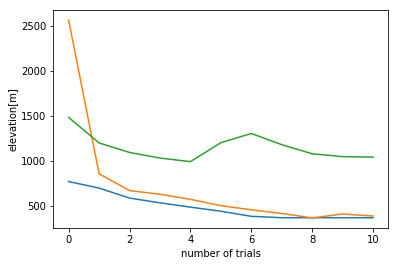

In [15]:
# グラフ設定
plt.xlabel("number of trials")
plt.ylabel("elevation[m]")

# y軸の値をndarrayを転地してセット
plt.plot(y_array.T)

plt.show()

## 【問題6】（アドバンス課題）ハイパーパラメータの検証

In [16]:
# ハイパーパラメータ調整の勾配降下法の関数
def gradient_descent_hyperparameter(x, alpha, max_iter=20):
    gradient = compute_gradient(x)
    y = fuji[x,3]
    
    # 要素がalphaの数分の一次元配列を生成する
    alpha_len_onelist = np.ones(len(alpha), dtype="int64")
    
    # 初期値のyを要素数分増やす
    y = y * alpha_len_onelist 
    
    # 
    y_array = y.reshape(len(x)*len(alpha),1)

    # 回数
    count = 0
    
    # 指定の回数まで繰り返す
    while count <= max_iter:
        gradient = compute_gradient(x)
        x = x - alpha * gradient
        x = np.round(x).astype(np.int64)
        y = fuji[x,3]
        y = y.reshape(len(x),1)
        y_array =  np.concatenate((y_array,y),axis=1)
        count += 1
    return x, y_array

In [17]:
# x軸の配列生成
x = np.array([136])

# 学習係数を交差配列を生成して試す
alpha = np.arange(0.01, 0.1, 0.01)
alpha

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [18]:
# 色々な学習係数を使い勾配降下法を実行する
x, y_array = gradient_descent_hyperparameter(x,alpha)
x, y_array

(array([120, 114,  99,  95,  92,  87,  85,  83,  79]),
 array([[3434.59, 3087.81, 2967.9 , 2825.55, 2703.1 , 2563.4 , 2426.1 ,
         2306.85, 2196.53, 2076.15, 1953.48, 1850.02, 1781.98, 1726.5 ,
         1659.43, 1598.36, 1598.36, 1598.36, 1598.36, 1598.36, 1598.36,
         1598.36],
        [3434.59, 2967.9 , 2563.4 , 2196.53, 1953.48, 1781.98, 1726.5 ,
         1659.43, 1598.36, 1561.94, 1506.66, 1360.1 , 1292.52, 1239.97,
         1239.97, 1239.97, 1239.97, 1239.97, 1239.97, 1239.97, 1239.97,
         1239.97],
        [3434.59, 2703.1 , 2196.53, 1781.98, 1659.43, 1561.94, 1429.75,
         1292.52, 1219.86, 1105.8 , 1059.69, 1034.34, 1000.24,  973.32,
          932.74,  910.5 ,  883.89,  858.62,  817.62,  795.25,  772.58,
          753.68],
        [3434.59, 2426.1 , 1850.02, 1659.43, 1561.94, 1429.75, 1239.97,
         1219.86, 1105.8 , 1034.34, 1000.24,  973.32,  910.5 ,  883.89,
          858.62,  795.25,  772.58,  753.68,  741.17,  725.72,  700.15,
          672.36],
     

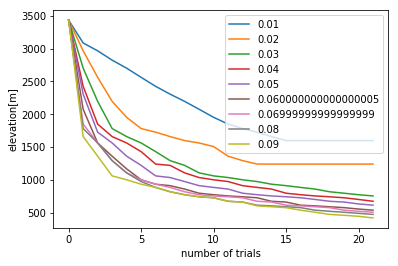

In [19]:
# グラフ設定
plt.xlabel("number of trials")
plt.ylabel("elevation[m]")

# 高さ配列の転地
plt.plot(y_array.T)

# 判例を指定
plt.legend(alpha)

plt.show()

## 【問題7】（アドバンス課題）局所最適解

In [20]:
# 局所的最適解になる関数を作成
def gradient_descent_localoptimum(x, alpha, max_iter=20):

    # 学習率
    alpha = alpha.reshape(len(alpha),1)
    
    # 勾配
    gradient = compute_gradient(x)
    
    # 高さ
    y = fuji[x,3]
    
    # 学習率分の一次元配列
    alpha_len_onelist = np.ones(len(alpha), dtype="int64").reshape(len(alpha),1)
    
    y = y * alpha_len_onelist
    y_array = y.reshape(len(alpha)*len(x),1)
        
    # 回数
    count = 0
    
    while count <= max_iter:
        gradient = compute_gradient(x)
        x = x - alpha * gradient
        x = np.round(x).astype(np.int64)
        y = fuji[x,3].reshape(len(y_array),1)
        y_array =  np.concatenate((y_array,y),axis=1)
        count += 1
        
    return x, y_array

In [35]:
# 任意の学習率
alpha = np.arange(0.1, 0.7, 0.2)

# 任意の地点
x = np.array([100,136,170])

# 学習率ごとの勾配降下
x, y_array = gradient_descent_localoptimum(x, alpha)

# 次元数
print(y_array.ndim)

# 各次元のサイズ
print(y_array.shape)

# 全要素数
print(y_array.size)

# 実物
print(y_array)

2
(9, 22)
198
[[ 772.58  741.17  700.15  631.71  602.36  588.99  575.07  536.54  505.1
   471.82  458.66  420.6   420.6   420.6   420.6   420.6   420.6   420.6
   420.6   420.6   420.6   420.6 ]
 [3434.59 1561.94 1219.86 1000.24  910.5   817.62  772.58  741.17  700.15
   631.71  602.36  588.99  575.07  536.54  505.1   471.82  458.66  420.6
   420.6   420.6   420.6   420.6 ]
 [1160.85 1095.73 1053.28 1049.33 1049.33 1049.33 1049.33 1049.33 1049.33
  1049.33 1049.33 1049.33 1049.33 1049.33 1049.33 1049.33 1049.33 1049.33
  1049.33 1049.33 1049.33 1049.33]
 [ 772.58  660.43  505.1   420.6   418.41  362.29  519.54  458.66  386.64
   371.04  368.91  454.21  552.23  462.33  390.14  386.64  371.04  368.91
   454.21  552.23  462.33  390.14]
 [3434.59  505.1   420.6   418.41  362.29  519.54  458.66  386.64  371.04
   368.91  454.21  552.23  462.33  390.14  386.64  371.04  368.91  454.21
   552.23  462.33  390.14  386.64]
 [1160.85 1049.33 1043.91 1022.1   970.58 1321.2  1963.73  985.66  960.52


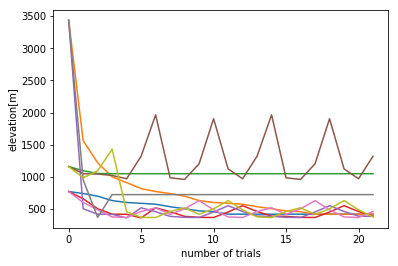

In [33]:
# グラフ設定
plt.xlabel("number of trials")
plt.ylabel("elevation[m]")

# 高さ配列の転地
plt.plot(y_array.T)

plt.show()